# Introduction
* In this __kernel__ i am going to explore the dataset. Try to understand the relations between features. 
* I am going to make an [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (Exploratory Data Analysis) with different commonly used __classifiers__ in Machine Learning.
* And finally i will build a __Model__ with high __accuracy score__

## Dataset Information
> It is an educational data set which is collected from learning management system (LMS) called __Kalboard 360__.

* The dataset consists of __480__ student records and __16__ features
* No __null__ or __empty__ values
* Features are classified into __three__ major categories: 

    1. __Demographic__ features such as gender and nationality. 
    2. __Academic background__ features such as educational stage, grade Level and section. 
    3. __Behavioral features__ such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.
 
* The dataset consists of __305__ males and __175__ females
* Most students comes from __Kuwait__ and __Jordan__
* The dataset is collected through two educational __semesters__
* Students are classified into three numerical intervals based on their total __grade/mark__:
    1. __Low-Level__: interval includes values from __0__ to __69__
    2. __Middle-Level__: interval includes values from __70__ to __89__
    3. __High-Level__: interval includes values from __90__ to __100__



In [1]:
# Loading necessary packages 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# loading dataset
dataset = pd.read_csv("../input/xAPI-Edu-Data.csv")

In [3]:
# A summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [4]:
# breif description of the numerical valued feature
dataset.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


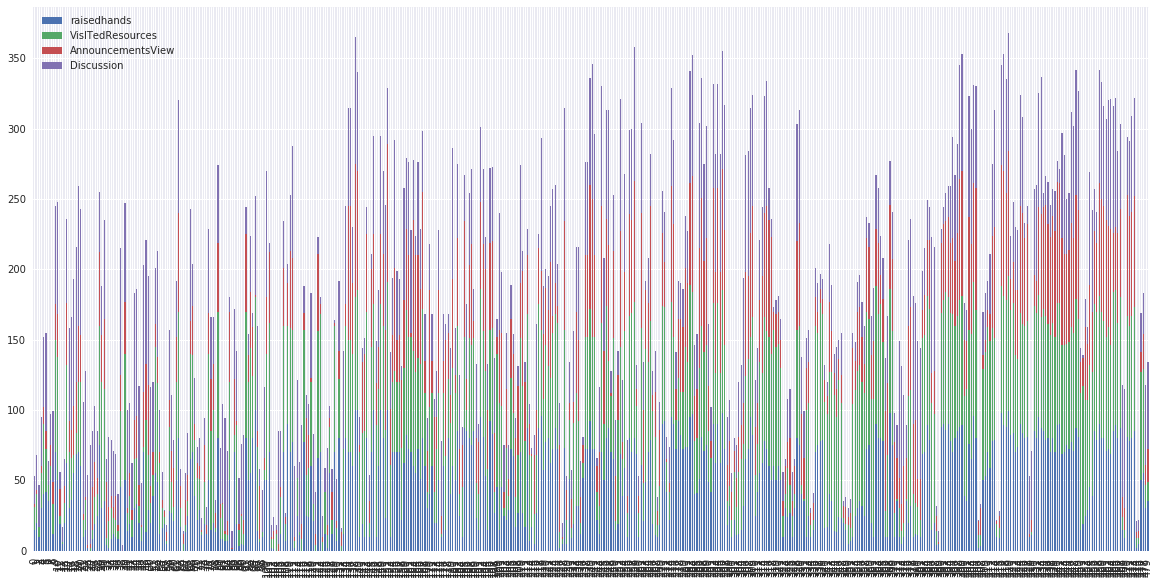

In [5]:
dataset.plot.bar(stacked=True, figsize=(20,10))

Text(0,0.5,'No. of student, on particular times')

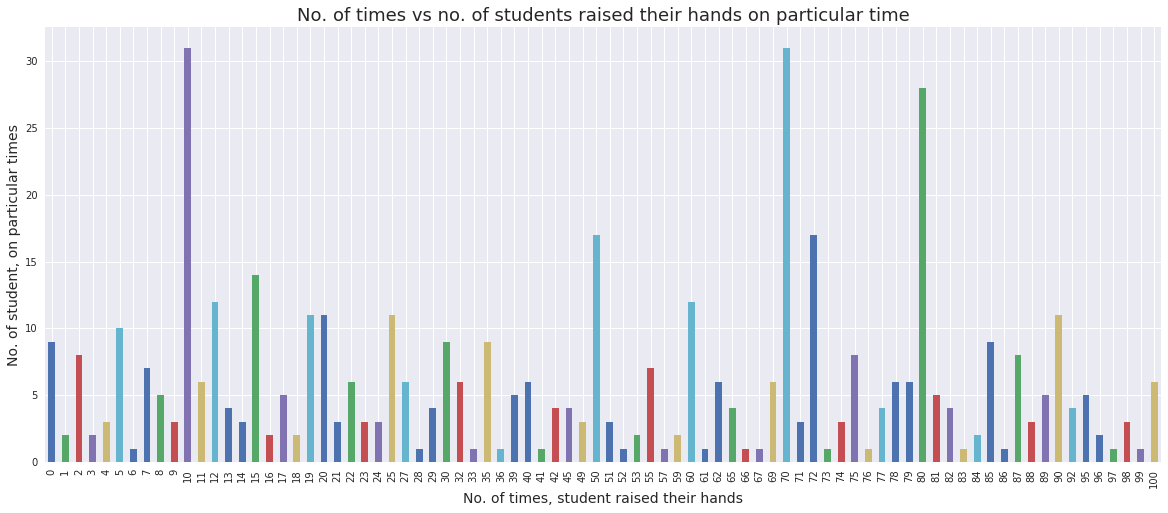

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))

dataset["raisedhands"].value_counts().sort_index().plot.bar(
    ax=ax
)
ax.set_title("No. of times vs no. of students raised their hands on particular time", fontsize=18)
ax.set_xlabel("No. of times, student raised their hands", fontsize=14)
ax.set_ylabel("No. of student, on particular times", fontsize=14)

Text(0,0.5,'No. of student, on particular visit')

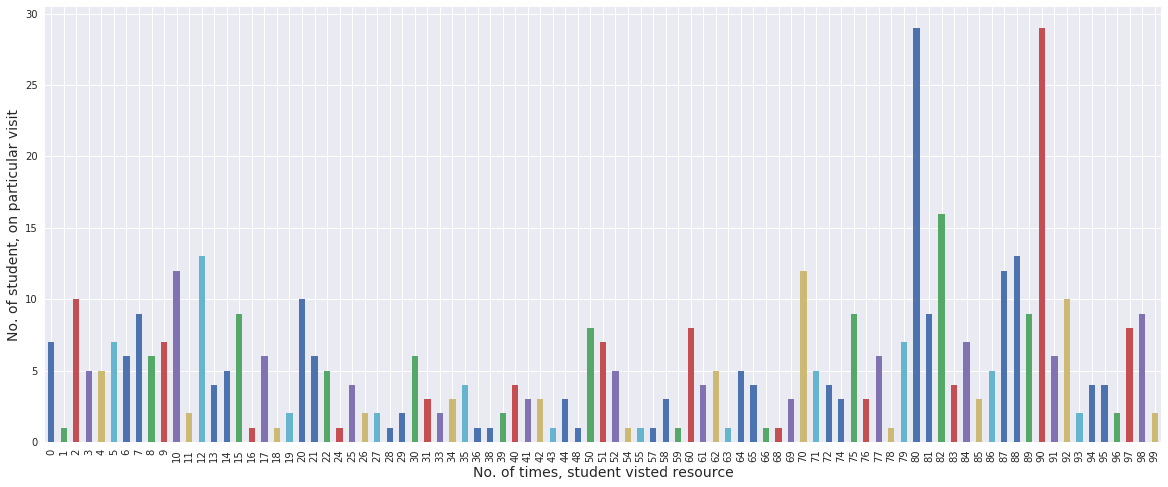

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))

dataset["VisITedResources"].value_counts().sort_index().plot.bar(
    ax=ax
)
ax.set_xlabel("No. of times, student visted resource", fontsize=14)
ax.set_ylabel("No. of student, on particular visit", fontsize=14)

> Before jumping into __Data Cleaning__ and __Feature Engineering__ lets make a model based on only 3 features (raisedhands, VisITedResources, AnnouncementsView) described in this [paper](https://github.com/78526Nasir/Kaggle-Student-s-Academic-Performance/blob/master/related%20resarch%20paper/Classify%20the%20Category%20of%20Students%20%20p28-alam.pdf) as top/most effective variables

In [8]:
top_features = ["raisedhands","VisITedResources","AnnouncementsView"]
features = dataset[top_features]
labels = dataset["Class"]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .20, random_state=0)

In [9]:
# model build with SVM.SVC classifier

clf = SVC(gamma='auto', kernel = 'linear')
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

In [10]:
accuracy_score(pred, labels_test)

0.65625

In [11]:
# Random Forest Classifier with 200 subtrees

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.625

In [12]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.6041666666666666

In [13]:
# Multi-layer Perceptron classifier with (30,30,30) hidden layers

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 30, 20), random_state=1)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.6875

In [14]:
# XGBoost Classifier

clf = XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=200, seed=10)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.625

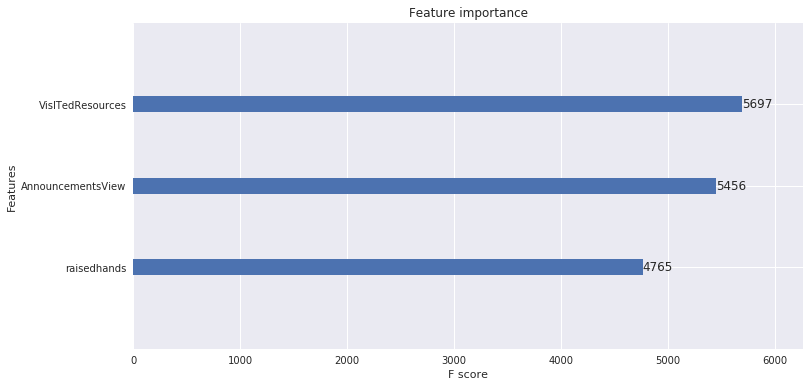

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
plot_importance(clf, ax = ax)

> ### Till now best accuracy on reduced features model: 0.6875

## Now lets deep dive into the dataset and start cleaning the data and do some feature engineering

In [16]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [17]:
dataset.groupby("gender").count()

,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,,,,,,,,,,,,,,,,
F,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
M,305,305,305,305,305,305,305,305,305,305,305,305,305,305,305,305


In [18]:
def gen_bar(feature, size):
    highest = dataset[dataset["Class"]=="H"][feature].value_counts()
    medium = dataset[dataset["Class"]=="M"][feature].value_counts()
    low = dataset[dataset["Class"]=="L"][feature].value_counts()
    
    df = pd.DataFrame([highest, medium, low])
    df.index = ["highest","medium", "low"]
    df.plot(kind='bar',stacked=True, figsize=(size[0], size[1]))

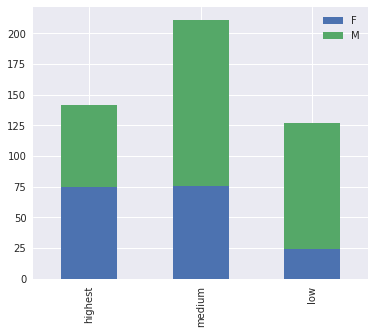

In [19]:
gen_bar("gender",[6,5])

> From this bar chart we visualize that __male__ students are more on "medium" and "lower" category compared to __female__ student.

In [20]:
# lets map the gender
gender_map = {"F" : 0, "M" : 1}
dataset["gender"] = dataset["gender"].map(gender_map)

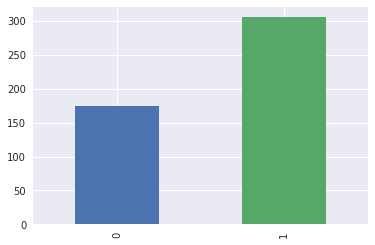

In [21]:
dataset["gender"].value_counts().sort_index().plot.bar()

> ### __gender__ done, lets moved to "NationaliTy"

In [22]:
dataset["NationalITy"].describe()

count     480
unique     14
top        KW
freq      179
Name: NationalITy, dtype: object

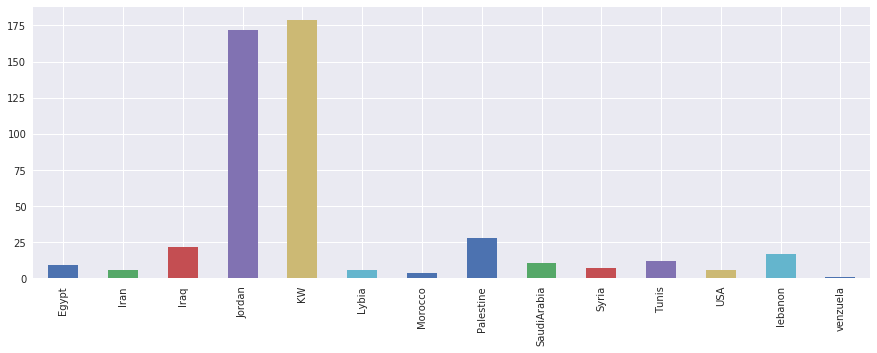

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))

dataset["NationalITy"].value_counts().sort_index().plot.bar(
    ax = ax
)

> We can see that most of the __students__ are from __jordan__ and __kuwait__

In [24]:
dataset["NationalITy"] = dataset["NationalITy"].replace(["Jordan","KW"], "0")
dataset["NationalITy"] = dataset["NationalITy"].replace(["Iraq","Palestine"], "1")
dataset["NationalITy"] = dataset["NationalITy"].replace(["Tunis","lebanon", "SaudiArabia"], "2")
dataset["NationalITy"] = dataset["NationalITy"].replace(["Syria","Egypt","Iran","Morocco","USA","venzuela","Lybia"], "3")

dataset["NationalITy"] = dataset["NationalITy"].astype(int)

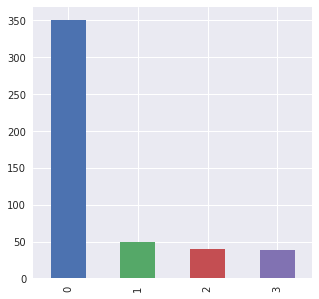

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
dataset["NationalITy"].value_counts().sort_index().plot.bar(
    ax = ax
)

> Theirs a small diffrence between __PlaceofBirth__ and __NationalITy__ values. But we can ignore that! and simply delete the __PlaceofBirth__ feature

In [26]:
del dataset["PlaceofBirth"]

### Lets explore __StageID__

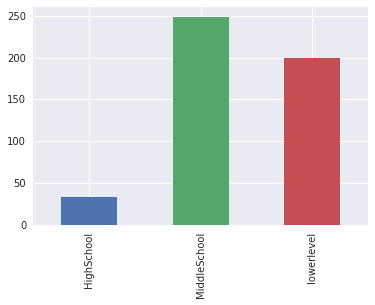

In [27]:
dataset["StageID"].value_counts().sort_index().plot.bar()

In [28]:
stage_map = {"HighSchool" : 0, "MiddleSchool" : 1, "lowerlevel": 2}
dataset["StageID"] = dataset["StageID"].map(stage_map)

### Working with GradeID

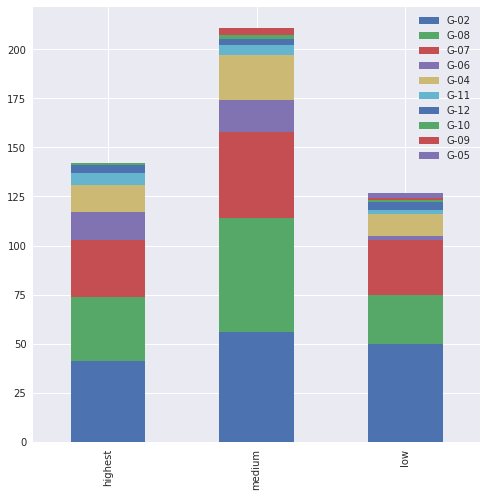

In [29]:
gen_bar("GradeID",[8,8])

In [30]:
dataset["GradeID"] = dataset["GradeID"].replace(["G-02","G-08","G-07"], "0")
dataset["GradeID"] = dataset["GradeID"].replace(["G-04","G-06"], "1")
dataset["GradeID"] = dataset["GradeID"].replace(["G-05","G-11", "G-12","G-09","G-10"], "2")

dataset["GradeID"] = dataset["GradeID"].astype(int)

### Working with SectionID

In [31]:
dataset.groupby("SectionID").count()

,gender,NationalITy,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
SectionID,,,,,,,,,,,,,,,
A,283,283,283,283,283,283,283,283,283,283,283,283,283,283,283
B,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167
C,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


In [32]:
section_map = {"A":0, "B":1, "C":2}
dataset["SectionID"] = dataset["SectionID"].map(section_map)

### Working with Topic

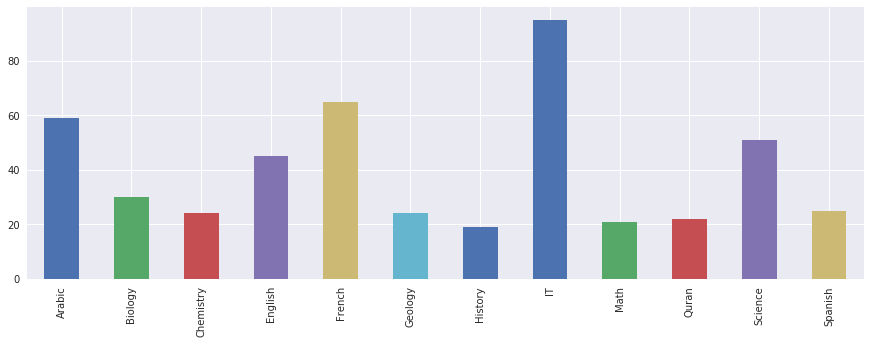

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
dataset["Topic"].value_counts().sort_index().plot.bar(ax = ax)

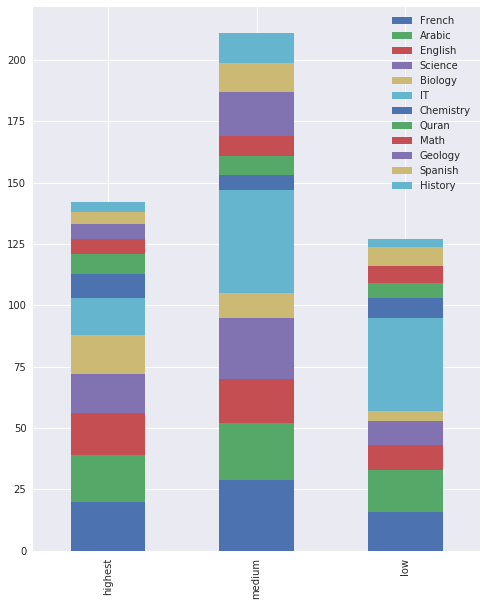

In [34]:
gen_bar("Topic", [8,10])

In [35]:
pd.crosstab(dataset["Class"],dataset["Topic"])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


In [36]:
topic_map = {"IT":0, "Arabic":1, "French":2, "English":3, "Biology":4, "Science":5, "Chemistry":6, "Quran":7, "Geology":8, "History":8,"Math":8,"Spanish":8}
dataset["Topic"] = dataset["Topic"].map(topic_map)

In [37]:
dataset.groupby("Topic").count()

,gender,NationalITy,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
Topic,,,,,,,,,,,,,,,
0,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
1,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
2,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
3,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
4,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
5,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
6,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
7,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
8,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89


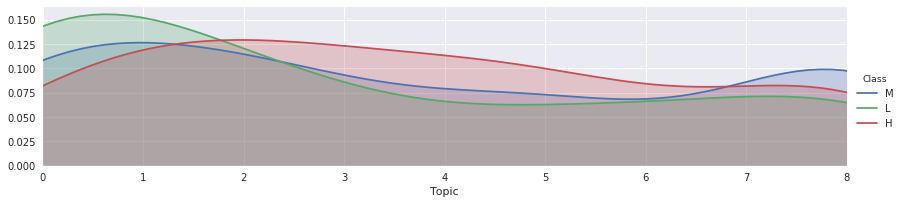

In [38]:
facet = sns.FacetGrid(dataset, hue="Class",aspect=4)
facet.map(sns.kdeplot,"Topic",shade= True)
facet.set(xlim=(0, dataset["Topic"].max()))
facet.add_legend()

plt.show()

### Working with Semester

In [39]:
dataset.groupby("Semester").count()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
Semester,,,,,,,,,,,,,,,
F,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
S,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235


In [40]:
pd.crosstab(dataset["Class"], dataset["Semester"])

Semester,F,S
Class,,
H,62,80
L,77,50
M,106,105


In [41]:
semester_map = {"F":0, "S":1}
dataset["Semester"] = dataset["Semester"].map(semester_map)

### Working with Relation Feature

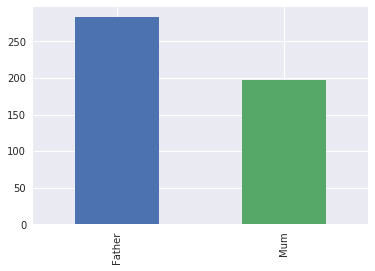

In [42]:
dataset["Relation"].value_counts().sort_index().plot.bar()

In [43]:
relation_map = {"Father":0, "Mum":1}
dataset["Relation"] = dataset["Relation"].map(relation_map)

### "raisedhands", "VisITedResources", "AnnouncementsView", "Discussion" are already in decent form
<hr>
#### Working with "ParentschoolSatisfaction"

In [44]:
dataset["ParentschoolSatisfaction"].nunique()

2

In [45]:
parent_ss_map = {"Bad": 0, "Good":1}
dataset["ParentschoolSatisfaction"] = dataset["ParentschoolSatisfaction"].map(parent_ss_map)

In [46]:
dataset.groupby("ParentschoolSatisfaction").count()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,StudentAbsenceDays,Class
ParentschoolSatisfaction,,,,,,,,,,,,,,,
0,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
1,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292


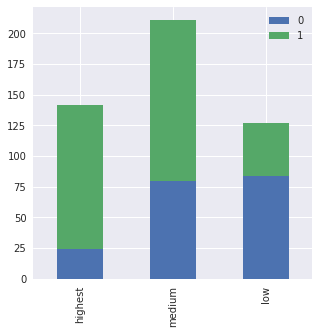

In [47]:
gen_bar("ParentschoolSatisfaction", [5,5])

### Working with "ParentAnsweringSurvey"

In [57]:
dataset.groupby("ParentAnsweringSurvey").count()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
ParentAnsweringSurvey,,,,,,,,,,,,,,,
No,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210
Yes,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270


In [58]:
parent_a_s_map = {"No":0, "Yes":1}
dataset["ParentAnsweringSurvey"] = dataset["ParentAnsweringSurvey"].map(parent_a_s_map)

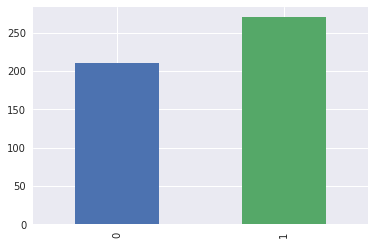

In [62]:
dataset["ParentAnsweringSurvey"].value_counts().sort_index().plot.bar()

### Working with StudentAbsenceDays Feature

In [63]:
dataset.groupby("StudentAbsenceDays").count()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,Class
StudentAbsenceDays,,,,,,,,,,,,,,,
0,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191
1,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289


In [49]:
student_absn_day_map = {"Above-7":0, "Under-7":1} 
dataset["StudentAbsenceDays"] = dataset["StudentAbsenceDays"].map(student_absn_day_map)

In [50]:
dataset.groupby("StudentAbsenceDays").count()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,Class
StudentAbsenceDays,,,,,,,,,,,,,,,
0,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191
1,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289


In [64]:
dataset.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,0,2,1,0,0,0,0,15,16,2,20,1,1,1,M
1,1,0,2,1,0,0,0,0,20,20,3,25,1,1,1,M
2,1,0,2,1,0,0,0,0,10,7,0,30,0,0,0,L
3,1,0,2,1,0,0,0,0,30,25,5,35,0,0,0,L
4,1,0,2,1,0,0,0,0,40,50,12,50,0,0,0,M


### Last but not the least! Working with "Class" feature

In [53]:
dataset.groupby("Class").count()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
Class,,,,,,,,,,,,,,,
H,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
L,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
M,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211


In [82]:
class_map = {"H":0, "M":1, "L":2}
dataset["Class"] = dataset["Class"].map(class_map)

In [100]:
dataset.groupby("Class").count()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
Class,,,,,,,,,,,,,,,
0,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
1,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211
2,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127


## Data Cleaning almost done.

### Finding correlation

In [92]:
dataset.corr()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,1.000000,0.036658,-0.017793,-0.082831,0.054907,0.012056,0.049156,-0.195142,-0.149978,-0.210932,-0.052139,-0.124703,-0.022359,-0.093478,-0.209011,0.263490
NationalITy,0.036658,1.000000,-0.074194,0.006456,0.079478,0.036725,0.153738,0.136429,0.070879,0.036265,0.108893,-0.063254,0.035613,0.097600,0.046045,-0.065275
StageID,-0.017793,-0.074194,1.000000,-0.368472,0.296416,-0.374270,-0.029512,0.034205,-0.172751,-0.068621,-0.163666,-0.161406,-0.114025,0.014272,-0.112536,0.083997
GradeID,-0.082831,0.006456,-0.368472,1.000000,-0.246886,0.006907,-0.064835,-0.009679,0.002821,-0.069604,0.041476,0.125901,-0.045097,-0.024444,-0.010665,-0.047167
SectionID,0.054907,0.079478,0.296416,-0.246886,1.000000,-0.194117,0.046763,0.005783,-0.143862,-0.080909,-0.144955,-0.102538,-0.018449,-0.070405,0.037062,0.036850
Topic,0.012056,0.036725,-0.374270,0.006907,-0.194117,1.000000,0.253506,0.063707,0.252959,0.221723,0.316949,0.106555,0.092280,0.055013,0.038240,-0.101477
Semester,0.049156,0.153738,-0.029512,-0.064835,0.046763,0.253506,1.000000,0.148705,0.178358,0.173219,0.287066,0.019083,0.023628,-0.025258,0.072462,-0.126239
Relation,-0.195142,0.136429,0.034205,-0.009679,0.005783,0.063707,0.148705,1.000000,0.364237,0.360240,0.339505,0.026720,0.163811,0.287698,0.219687,-0.401142
raisedhands,-0.149978,0.070879,-0.172751,0.002821,-0.143862,0.252959,0.178358,0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,0.463882,-0.646298
VisITedResources,-0.210932,0.036265,-0.068621,-0.069604,-0.080909,0.221723,0.173219,0.360240,0.691572,1.000000,0.594500,0.243292,0.382472,0.363835,0.499030,-0.677094


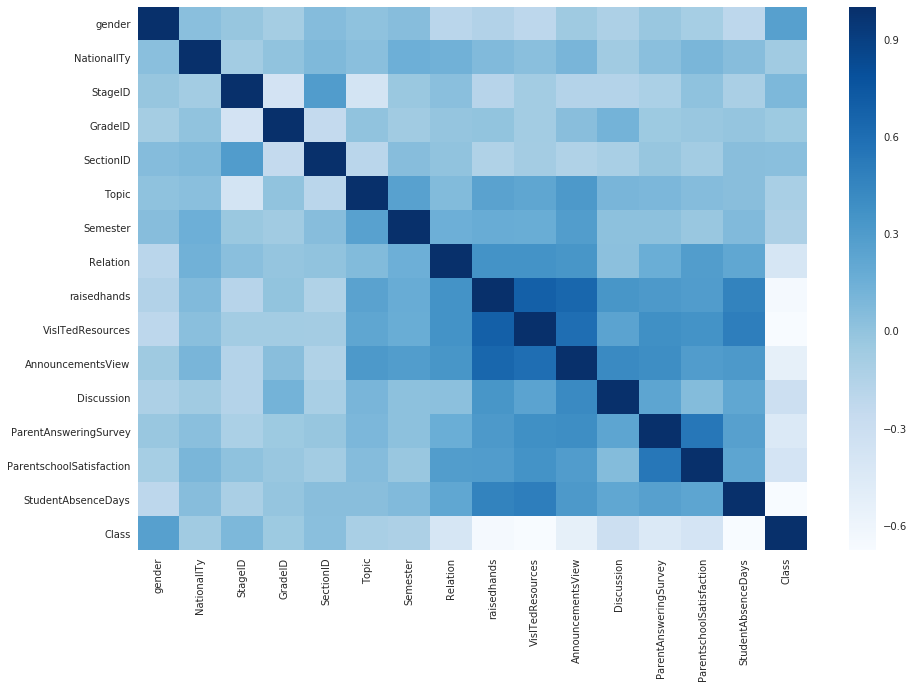

In [128]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(dataset.corr(), cmap='Blues')

In [144]:
features = dataset.iloc[:,0:15]
lables = dataset.iloc[:,15:16]

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .20, random_state=0)


In [145]:
# model build with SVM.SVC classifier

clf = SVC(gamma='auto', kernel = 'linear')
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

In [146]:
accuracy_score(pred, labels_test)

0.7395833333333334

In [147]:
# Random Forest Classifier with 200 subtrees

clf = RandomForestClassifier(n_estimators = 20)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.7291666666666666

In [148]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.6041666666666666

In [149]:
# Multi-layer Perceptron classifier with (20,20) hidden layers

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.7083333333333334

In [150]:

clf = XGBClassifier(max_depth=20, learning_rate=0.1, n_estimators=200, seed=10)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.7916666666666666

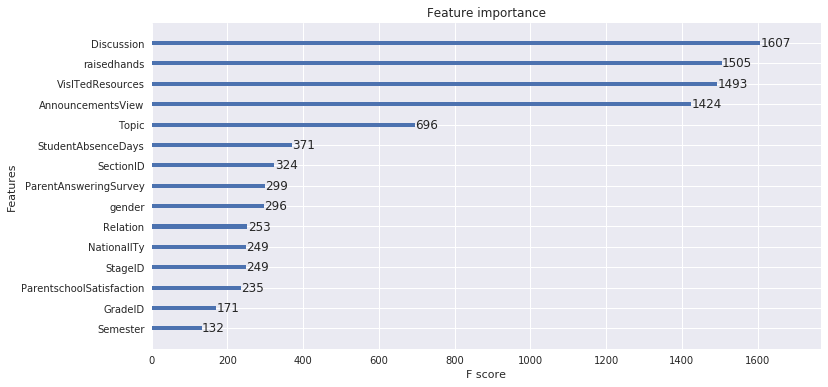

In [127]:
fig, ax = plt.subplots(figsize=(12,6))
plot_importance(clf, ax = ax)

# Till now Best accuracy : 0.7916666666666666